# Whole  analysis with all plots

/home/villarreal/.local/lib/python3.8/site-packages/torch/serialization.py:587: UserWarning: 'torch.load' received a zip file that looks like a TorchScript archive dispatching to 'torch.jit.load' (call 'torch.jit.load' directly to silence this warning)
  warnings.warn("'torch.load' received a zip file that looks like a TorchScript archive"


Validation MAE:
    energy:      0.077 eV/atom
    forces:      0.045 eV/atom/Ang


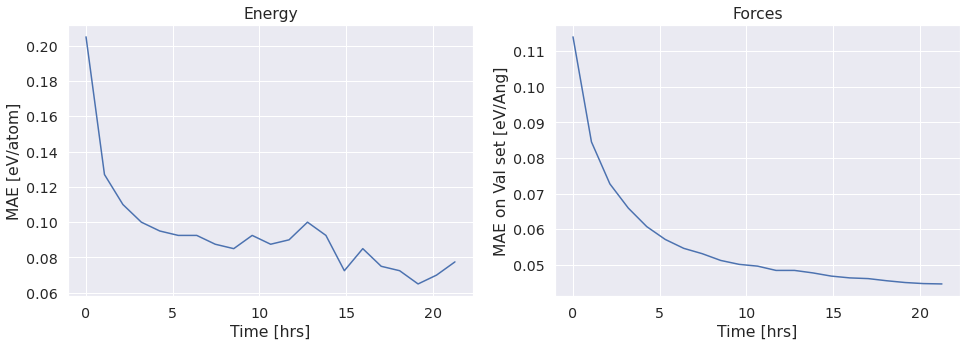

predicted forces
4.923293113708496
-1.449241406387753e-08
actual forces
5.09003462404002
3.0702463890868524e-17
predicted forces
4.923294544219971
9.738644699991485e-10
actual forces
5.09003462404002
3.0702463890868524e-17
predicted forces
3.442038059234619
5.507450780750793e-10
actual forces
3.71308184551241
-9.210739167260558e-17


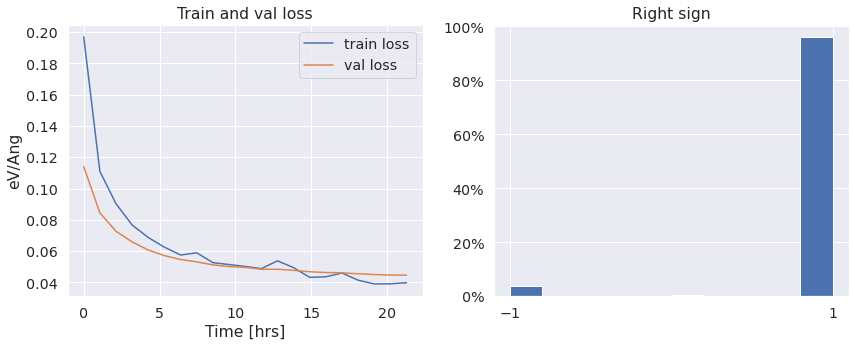

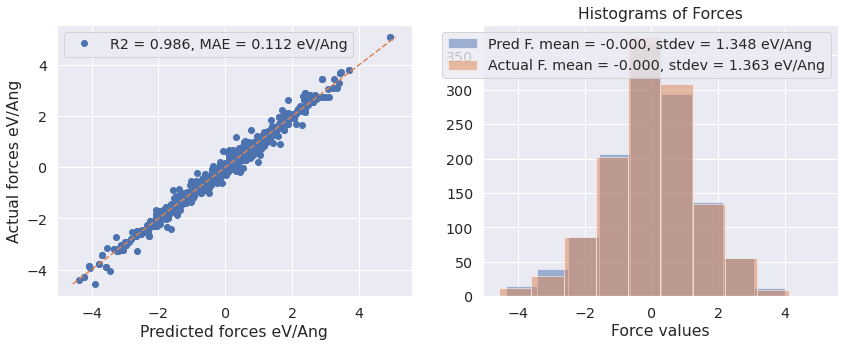

<Figure size 432x288 with 0 Axes>

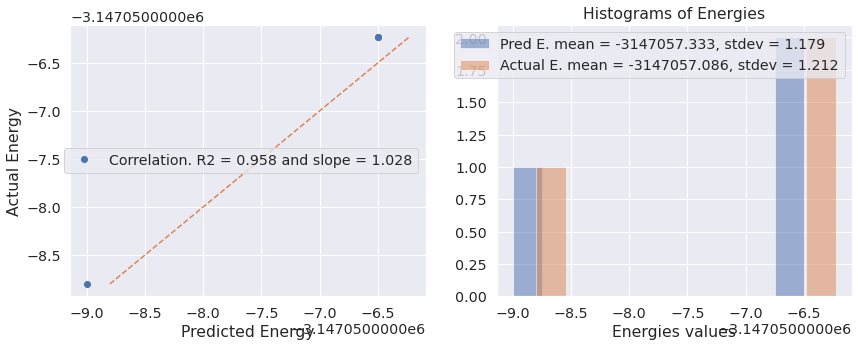

[0.9937908097344873, 0.9937908064336177, 0.9662211560063847]


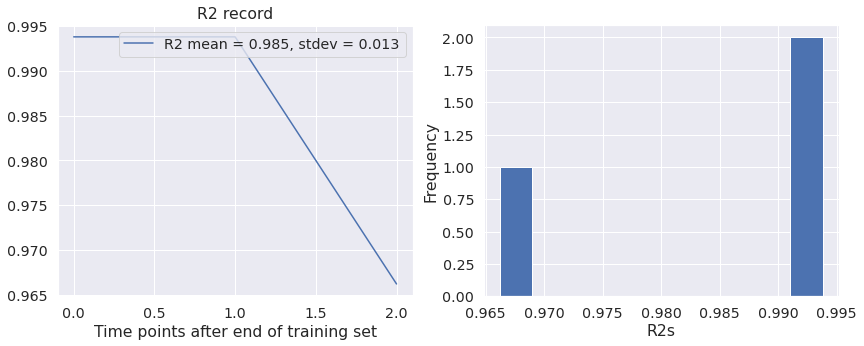

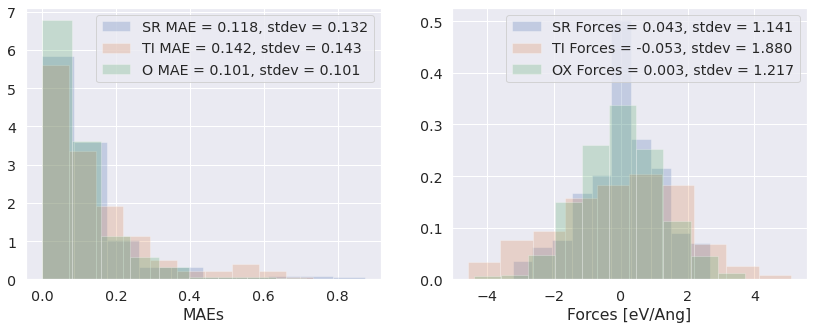

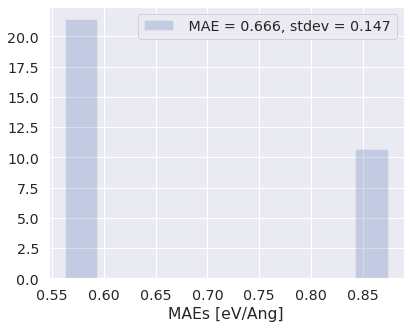

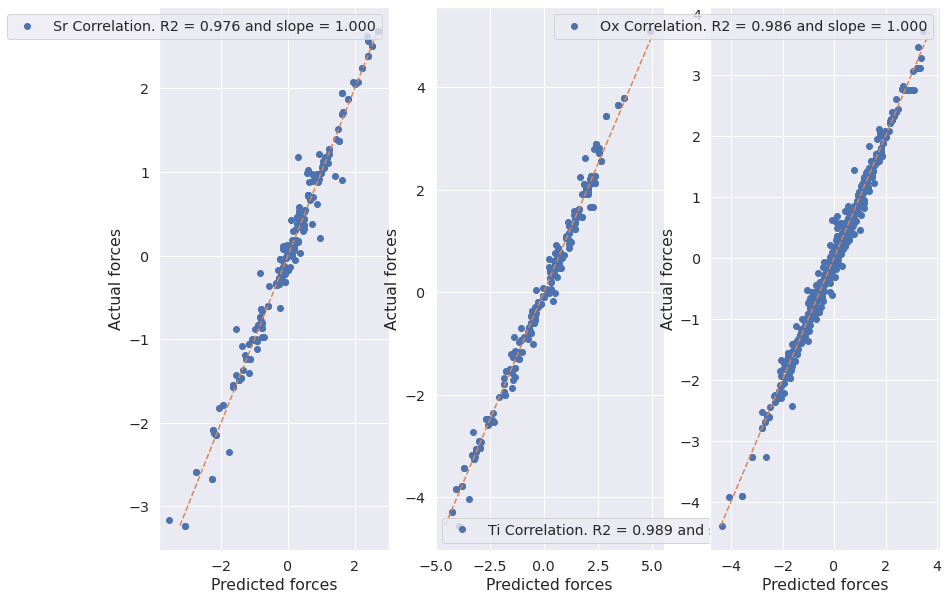

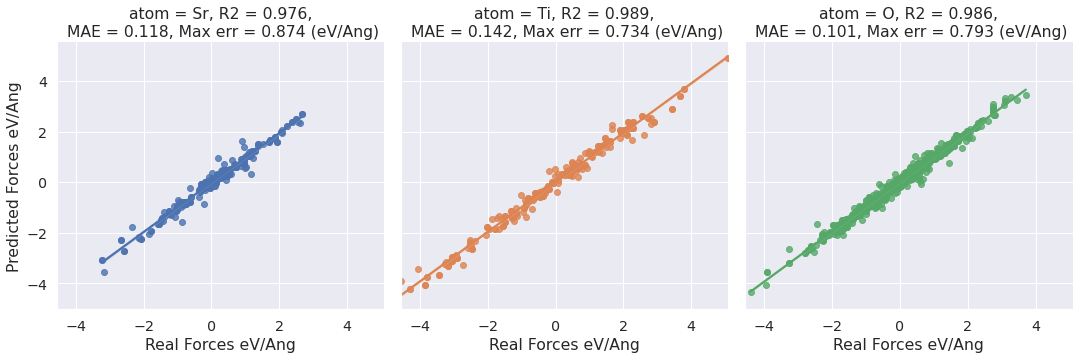

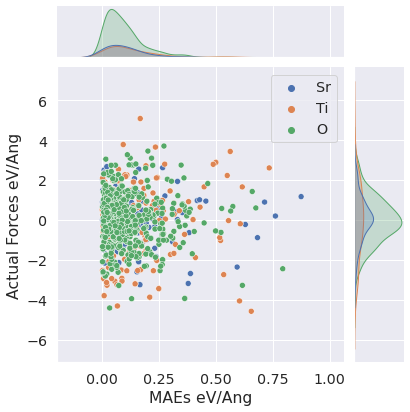

In [2]:
import numpy as np
import torch
import os
import logging
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
import seaborn as sns
import pandas as pd


from nequip.data import AtomicDataDict
from nequip.nn import (
    GraphModuleMixin,
    SequentialGraphNetwork,
    AtomwiseLinear,
    AtomwiseReduce,
    ForceOutput,
    PerSpeciesScaleShift,
    ConvNetLayer,
)
from nequip.nn.embedding import (
    OneHotAtomEncoding,
    RadialBasisEdgeEncoding,
    SphericalHarmonicEdgeAttrs,
)

from nequip.utils import Config
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from nequip.data import AtomicData


torch.cuda.empty_cache()
#PathToModel='nvt.300/'
#PathToModel='nvt.4000.lessatoms/'
#PathToModel='nvt.1500/md_5/randomized_2900Train/'
#PathToModel='nvt.1500/'
PathToModel='nvt.1500.RS/'
#PathToModel='nvt.1500.TRAINEDLONGER/'
#PathToTest='nvt.1500/md_5/randomized_2900Train/tutorial_data/trajectoryTest.npz'
#PathToModel='nvt.1200/md_4/randomized/'
#PathToModel='nvt.1500/md_5/randomized_14_epochs/'
#PathToModel='nvt.1500/md_5/randomized_25_epochs/'
#PathToModel='nvt.1500/md_5/randomized_40_epochs/'
#PathToTest='/home/villarreal/Documents/STO_MD/trainAndvalidation_and_test_datasets/trajectoryTest.npz'
#PathToTest='nvt.1200/md_4/randomized/trajectoryTest.npz'
#PathToTest='nvt.600/trajectoryTest.npz'
#PathToTest='nvt.1500/md_5/randomized/trajectoryTest.npz'
#PathToTest='nve.1/randomized/trajectoryTest.npz'
#PathToModel='nve.2/3000Train9000Test_sequential/'
#PathToTest='/home/villarreal/Documents/STO_MD/GPU_grid_search/26_randomizedTestTrain/trainAndvalidation_and_test_datasets/trajectoryTest.npz'
#PathToTest='nvt.p.1/randomized/trajectoryTest.npz'
#PathToTest='nve.2/3000Train9000Test_sequential/tutorial_data/trajectoryTest.npz'

config = Config.from_file(PathToModel+'tutorial.yaml')
#final_model=torch.load(PathToModel+'tutorial-results/example-run/best_model.pth',map_location='cpu')
final_model=torch.load(PathToModel+'deployed.pth')
#dataset=np.load('tutorial_data/trajectoryTest.npz')

#PathToTest1='nvt.300/trajectoryTest.npz'
#PathToTest2='nvt.600/trajectoryTest.npz'
#PathToTest3='nvt.900/trajectoryTest.npz'
#PathToTest4='nvt.1200.2/trajectoryTest.npz'
#PathToTest5='nvt.1500/md_5/randomized_2900Train/tutorial_data/trajectoryTest.npz'

#benzene_data = np.load(config.dataset_file_name)
#benzene_data=np.load(PathToTest)

#print(np.shape(benzene_data['R']))


results_path=PathToModel+'tutorial-results/example-run'
#results_path=PathToModel+'tutorial-results/requeue'

# Load logged results
results = np.loadtxt(os.path.join(results_path, 'metrics_epoch.csv'), skiprows=1, delimiter=',')

# Determine time axis
time = (results[:,1]-results[0,1])/(60*60)

# Load the validation MAEs
energy_mae = results[:,14]
forces_mae = results[:,13]
train_loss=results[:,7] #
val_loss=results[:,13]
# Get final validation errors
print('Validation MAE:')
print('    energy: {:10.3f} eV/atom'.format(energy_mae[-1]))
print('    forces: {:10.3f} eV/atom/Ang'.format(forces_mae[-1]))

# Construct figure
plt.figure(figsize=(16,5))

# Plot energies
plt.subplot(1,2,1)
plt.plot(time, energy_mae)
plt.title('Energy')
plt.ylabel('MAE [eV/atom]')
plt.xlabel('Time [hrs]')

# Plot forces
plt.subplot(1,2,2)
plt.plot(time, forces_mae)
plt.title('Forces')
plt.ylabel('MAE on Val set [eV/Ang]')
plt.xlabel('Time [hrs]')

plt.show()

#END OF MAEs
##################################################################################################
# Construct figure
plt.figure(figsize=(14,5))
# Plot train and val loss
plt.subplot(1,2,1)
plt.plot(time, train_loss,label='train loss')
plt.plot(time, val_loss,label='val loss')
plt.title('Train and val loss')
plt.ylabel('eV/Ang')
plt.xlabel('Time [hrs]')
plt.legend()




def atomic_number_vector(n):

    
    if n == 135:
        # 135
        z=np.array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
               38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 22, 22, 22, 22, 22, 22, 22,
               22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
               22, 22, 22,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8])

        ##120
    elif n==120:
        z=np.array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
              38, 38, 38, 38, 38, 38, 38, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
              22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,  8,  8,  8,
               8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
               8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
               8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
               8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
               8])
    elif n==60:    
        # 60
        z=np.array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 22, 22, 22, 22, 22,
                22, 22, 22, 22, 22, 22, 22,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                 8,  8,  8,  8,  8,  8,  8,  8,  8])    
    return z
    
    
z = atomic_number_vector(135)    
    
    
## 135
#z=np.array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
#        38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 22, 22, 22, 22, 22, 22, 22,
#        22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
#        22, 22, 22,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8])

###120

#z=np.array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
#       38, 38, 38, 38, 38, 38, 38, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
#       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,  8,  8,  8,
#        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#        8])
# z=np.array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 22, 22, 22, 22, 22,
#         22, 22, 22, 22, 22, 22, 22,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#          8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
#          8,  8,  8,  8,  8,  8,  8,  8,  8])


sr=(z==38)
ti=(z==22)
o=(z==8)











error_sr_list=[]
error_ti_list=[]
error_o_list=[]

actual_sr_list=[]
predicted_sr_list=[]
actual_ti_list=[]
predicted_ti_list=[]
actual_o_list=[]
predicted_o_list=[]


stats=[]
predicted_forces=[]
actual_forces=[]
predicted_energies=[]
actual_energies=[]
r2_record=[]
final_model.eval()


i_list=[]
maes_list=[]
energies_list=[]




PathToTest1='nvt.300/tutorial_data/trajectoryTest.npz'
PathToTest2='nvt.600/trajectoryTest.npz'
PathToTest3='nvt.900/trajectoryTest.npz'
PathToTest4='nvt.1200.2/trajectoryTest.npz'
PathToTest5='nvt.1500/md_5/randomized_2900Train/tutorial_data/trajectoryTest.npz'
PathToTest5='nvt.1500/tutorial_data/trajectoryTest.npz'
PathToTestTetragonal='/home/villarreal/Documents/STO_MD/GPU_grid_search/26_randomizedTestTrain/trainAndvalidation_and_test_datasets/trajectoryTest.npz'
PathToTest6='nvt.4000.lessatoms/tutorial_data/trajectoryTest.npz'
#PathToTest7='nvt.1500.TRAINEDLONGER/tutorial_data/trajectoryTest.npz'

size_test=3
for k in range(size_test):
 #for PathToTest in [PathToTest1,PathToTest2,PathToTest3,PathToTest4,PathToTest5]:
  for PathToTest in [PathToTest5]:
    benzene_data=np.load(PathToTest)
    i=np.random.randint(1,len(benzene_data['R']))
    i_list.append(i)
    r = benzene_data['R'][i] #+3
    #print(r)
    forces = benzene_data['F'][i]
    energies=benzene_data['E'][i]
    energies_list.append(energies)

    #final_model.eval(); 


    data = AtomicData.from_points(
        pos=r,
        r_max=config['r_max'],
        **{AtomicDataDict.ATOMIC_NUMBERS_KEY: torch.Tensor(torch.from_numpy(benzene_data['z'].astype(np.float32))).to(torch.int64)}
    )
    data = data.to('cpu')

    prediction = final_model(AtomicData.to_AtomicDataDict(data))['forces']
    prediction=prediction.cpu()
    
    


    #actual_forces_rshp=np.reshape(actual_forces,(-1,3))
    #predicted_forces_rshp=np.reshape(predicted_forces,(-1,3))
    actual_forces_rshp=forces.copy()
    predicted_forces_rshp=prediction.numpy()
    
    
    
    maes_list.append(np.max(np.abs(actual_forces_rshp-predicted_forces_rshp)))
    
    actual_sr_list.append(actual_forces_rshp[sr,:].ravel().tolist())
    predicted_sr_list.append(predicted_forces_rshp[sr,:].ravel().tolist())
    actual_ti_list.append(actual_forces_rshp[ti,:].ravel().tolist())
    predicted_ti_list.append(predicted_forces_rshp[ti,:].ravel().tolist())    
    actual_o_list.append(actual_forces_rshp[o,:].ravel().tolist())
    predicted_o_list.append(predicted_forces_rshp[o,:].ravel().tolist())    
    
    sr_error=np.abs(actual_forces_rshp[sr,:]-predicted_forces_rshp[sr,:])
    ti_error=np.abs(actual_forces_rshp[ti,:]-predicted_forces_rshp[ti,:])
    o_error=np.abs(actual_forces_rshp[o,:]-predicted_forces_rshp[o,:])   


    #sr_error=np.abs(actual_forces_rshp[sr,:]-predicted_forces_rshp[sr,:])/np.abs(actual_forces_rshp[sr,:])*100
    #ti_error=np.abs(actual_forces_rshp[ti,:]-predicted_forces_rshp[ti,:])/np.abs(actual_forces_rshp[ti,:])*100
    #o_error=np.abs(actual_forces_rshp[o,:]-predicted_forces_rshp[o,:])/np.abs(actual_forces_rshp[o,:])*100

    error_sr_list.append(sr_error.ravel())
    error_ti_list.append(ti_error.ravel())    
    error_o_list.append(o_error.ravel())  
    
    print("predicted forces")
    #print(prediction)
    print(np.max(prediction.ravel().tolist()))
    print(np.mean(prediction.ravel().tolist()))
    predicted_forces.append(prediction.ravel().tolist())
    prediction[abs(prediction)<1e-3]=0.0
    
    actual=forces
    print("actual forces")
    print(np.max(actual.ravel().tolist()))
    print(np.mean(actual.ravel().tolist()))
        #appendvalues
    actual_forces.append(actual.ravel().tolist())
    actual[abs(actual)<1e-3]=0.0
        #calculate signs with hadamard product
    hadamard_product=np.sign(np.multiply(prediction,actual)).ravel().tolist()
    hadamard_product[hadamard_product==0]=1.0
    stats.append(hadamard_product)
    r2_record.append(r2_score(actual,prediction))

        #calculate similar signs and stats for energies
    prediction=final_model(AtomicData.to_AtomicDataDict(data))['total_energy']
    prediction=prediction.cpu()
        #append values
    predicted_energies.append(prediction.ravel().tolist())
    actual=energies
        #appendvalues
    actual_energies.append(actual.ravel().tolist())



    
actual_sr_list=sum(actual_sr_list,[])
predicted_sr_list=sum(predicted_sr_list,[])
actual_ti_list=sum(actual_ti_list,[])
predicted_ti_list=sum(predicted_ti_list,[])
actual_o_list=sum(actual_o_list,[])
predicted_o_list=sum(predicted_o_list,[])    
    
    

############################### END OF STATS COLLECTING   
#print(predicted_energies) 
from matplotlib.ticker import PercentFormatter
#calculate the similar signs
stats=sum(stats,[])
plt.subplot(1,2,2)
plt.hist(stats,weights=np.ones(len(stats)) / len(stats))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.title('Right sign')
plt.xticks([-1,1])


plt.show()
#plt.savefig('TandVLossRightSignF.png')

predicted_forces=sum(predicted_forces,[])
actual_forces=sum(actual_forces,[])
#CORRELATION PLOTS FORCES
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
m, b = np.polyfit(predicted_forces, actual_forces, 1)
from sklearn.metrics import r2_score
r2=r2_score(actual_forces,predicted_forces)
mae=mean_absolute_error(actual_forces,predicted_forces)
plt.plot(predicted_forces, actual_forces,'o',label='R2 = %1.3f, MAE = %1.3f eV/Ang' %(r2,mae))
plt.plot([np.min(actual_forces), np.max(actual_forces)],[np.min(actual_forces), np.max(actual_forces)],'--')
plt.ylabel('Actual forces eV/Ang')
plt.xlabel('Predicted forces eV/Ang')
plt.legend()
#HISTOGRAM OF FORCE VALUES
plt.subplot(1,2,2)
mean_pred=np.mean(predicted_forces)
sdev_pred=np.std(predicted_forces)
mean_actual=np.mean(actual_forces)
sdev_actual=np.std(actual_forces)
plt.hist(predicted_forces,alpha=0.5, label='Pred F. mean = %1.3f, stdev = %1.3f eV/Ang' %(mean_pred,sdev_pred))
plt.hist(actual_forces,alpha=0.5,label='Actual F. mean = %1.3f, stdev = %1.3f eV/Ang' %(mean_actual,sdev_actual))
plt.title('Histograms of Forces')
plt.xlabel('Force values')
plt.legend(loc='upper right')
plt.show()
plt.savefig('CorrPlotsForceHist.png')



predicted_energies=sum(predicted_energies,[])
actual_energies=sum(actual_energies,[])

#CORRELATION PLOTS ENERGIES
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
m, b = np.polyfit(predicted_energies, actual_energies, 1)
from sklearn.metrics import r2_score
r2=r2_score(actual_energies,predicted_energies)
plt.plot(predicted_energies, actual_energies,'o',label='Correlation. R2 = %1.3f and slope = %1.3f' %(r2,m))
plt.plot([np.min(actual_energies), np.max(actual_energies)],[np.min(actual_energies), np.max(actual_energies)],'--')
plt.ylabel('Actual Energy')
plt.xlabel('Predicted Energy')
plt.legend()

#HISTOGRAM OF FORCE VALUES
plt.subplot(1,2,2)
mean_pred=np.mean(predicted_energies)
sdev_pred=np.std(predicted_energies)
mean_actual=np.mean(actual_energies)
sdev_actual=np.std(actual_energies)
plt.hist(predicted_energies,alpha=0.5, label='Pred E. mean = %1.3f, stdev = %1.3f' %(mean_pred,sdev_pred))
plt.hist(actual_energies,alpha=0.5,label='Actual E. mean = %1.3f, stdev = %1.3f' %(mean_actual,sdev_actual))
plt.title('Histograms of Energies')
plt.xlabel('Energies values')
plt.legend(loc='upper right')
plt.show()
#plt.savefig('CorrPlotsEnergyHist.png')




#RECORD OF R2S OVER TIME
plt.figure(figsize=(14,5))
print(r2_record)
plt.subplot(1,2,1)
mean_pred=np.mean(r2_record)
sdev_pred=np.std(r2_record)
plt.plot(r2_record, label='R2 mean = %1.3f, stdev = %1.3f' %(mean_pred,sdev_pred))
plt.title('R2 record')
plt.xlabel('Time points after end of training set')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.hist(r2_record,label='R2 mean = %1.3f, stdev = %1.3f' %(mean_pred,sdev_pred))
plt.xlabel('R2s')
plt.ylabel('Frequency')
#plt.savefig('R2Records.png')


plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
mean=np.mean(error_sr_list)
sdev=np.std(error_sr_list)
plt.hist(np.array(error_sr_list).ravel(),alpha=0.25,label='SR MAE = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
#plt.subplot(1,3,2)
mean=np.mean(error_ti_list)
sdev=np.std(error_ti_list)
plt.hist(np.array(error_ti_list).ravel(),alpha=0.25,label='TI MAE = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
#plt.subplot(1,3,3)
mean=np.mean(error_o_list)
sdev=np.std(error_o_list)
plt.hist(np.array(error_o_list).ravel(),alpha=0.25,label='O MAE = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
plt.xlabel('MAEs')

plt.subplot(1,2,2)
mean=np.mean(actual_sr_list)
sdev=np.std(actual_sr_list)
plt.hist(np.array(actual_sr_list).ravel(),alpha=0.25,label='SR Forces = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
#plt.subplot(1,3,2)
mean=np.mean(actual_ti_list)
sdev=np.std(actual_ti_list)
plt.hist(np.array(actual_ti_list).ravel(),alpha=0.25,label='TI Forces = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
#plt.subplot(1,3,3)
mean=np.mean(actual_o_list)
sdev=np.std(actual_o_list)
plt.hist(np.array(actual_o_list).ravel(),alpha=0.25,label='OX Forces = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
plt.xlabel('Forces [eV/Ang]')





plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
mean=np.mean(maes_list)
sdev=np.std(maes_list)
plt.hist(np.array(maes_list).ravel(),alpha=0.25,label=' MAE = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
plt.xlabel('MAEs [eV/Ang]')






plt.figure(figsize=(14,10))
plt.subplot(1,3,1)
m, b = np.polyfit(predicted_sr_list, predicted_sr_list, 1)
from sklearn.metrics import r2_score
r2=r2_score(actual_sr_list,predicted_sr_list)
plt.plot(predicted_sr_list, actual_sr_list,'o',label='Sr Correlation. R2 = %1.3f and slope = %1.3f' %(r2,m))
plt.plot([np.min(actual_sr_list), np.max(actual_sr_list)],[np.min(actual_sr_list), np.max(actual_sr_list)],'--')
plt.ylabel('Actual forces')
plt.xlabel('Predicted forces')
plt.legend()


plt.subplot(1,3,2)
m, b = np.polyfit(predicted_ti_list, predicted_ti_list, 1)
from sklearn.metrics import r2_score
r2=r2_score(actual_ti_list,predicted_ti_list)
plt.plot(predicted_ti_list, actual_ti_list,'o',label='Ti Correlation. R2 = %1.3f and slope = %1.3f' %(r2,m))
plt.plot([np.min(actual_ti_list), np.max(actual_ti_list)],[np.min(actual_ti_list), np.max(actual_ti_list)],'--')
plt.ylabel('Actual forces')
plt.xlabel('Predicted forces')
plt.legend()


plt.subplot(1,3,3)
m, b = np.polyfit(predicted_o_list, predicted_o_list, 1)
from sklearn.metrics import r2_score
r2=r2_score(actual_o_list,predicted_o_list)
plt.plot(predicted_o_list, actual_o_list,'o',label='Ox Correlation. R2 = %1.3f and slope = %1.3f' %(r2,m))
plt.plot([np.min(actual_o_list), np.max(actual_o_list)],[np.min(actual_o_list), np.max(actual_o_list)],'--')
plt.ylabel('Actual forces')
plt.xlabel('Predicted forces')
plt.legend()




############ BETTER LOOKING PLOTS


srlst=pd.DataFrame({'Real Forces eV/Ang':np.array(actual_sr_list).ravel(),'Predicted Forces eV/Ang':np.array(predicted_sr_list).ravel()})
tilst=pd.DataFrame({'Real Forces eV/Ang':np.array(actual_ti_list).ravel(),'Predicted Forces eV/Ang':np.array(predicted_ti_list).ravel()})
olst=pd.DataFrame({'Real Forces eV/Ang':np.array(actual_o_list).ravel(),'Predicted Forces eV/Ang':np.array(predicted_o_list).ravel()})


######### R2s
r2_sr=r2_score(actual_sr_list,predicted_sr_list)
r2_ti=r2_score(actual_ti_list,predicted_ti_list)
r2_o=r2_score(actual_o_list,predicted_o_list)
############

################ MAE
mae_sr=mean_absolute_error(actual_sr_list,predicted_sr_list)
mae_ti=mean_absolute_error(actual_ti_list,predicted_ti_list)
mae_o=mean_absolute_error(actual_o_list,predicted_o_list)
################


############# Max Error
max_sr=max_error(actual_sr_list,predicted_sr_list)
max_ti=max_error(actual_ti_list,predicted_ti_list)
max_o=max_error(actual_o_list,predicted_o_list)


sns.set(font_scale=1.3)
df=pd.concat([srlst,tilst,olst], keys=[
    "Sr, R2 = %1.3f,\n MAE = %1.3f, Max err = %1.3f (eV/Ang)"%(r2_sr,mae_sr,max_sr),
    "Ti, R2 = %1.3f,\n MAE = %1.3f, Max err = %1.3f (eV/Ang)"%(r2_ti,mae_ti,max_ti),
    "O, R2 = %1.3f,\n MAE = %1.3f, Max err = %1.3f (eV/Ang)"%(r2_o,mae_o,max_o),])

df.index = [index[0] for index in df.index.values]
#df["Sr"]
df["atom"]=df.index

kde=sns.lmplot(data=df,x="Real Forces eV/Ang",y="Predicted Forces eV/Ang",col="atom",hue="atom")





### JOINT PLOT MAE AND ACTUAL FORCES
srlst=pd.DataFrame({'MAEs eV/Ang':np.array(error_sr_list).ravel(),'Actual Forces eV/Ang':np.array(actual_sr_list).ravel()})
tilst=pd.DataFrame({'MAEs eV/Ang':np.array(error_ti_list).ravel(),'Actual Forces eV/Ang':np.array(actual_ti_list).ravel()})
olst=pd.DataFrame({'MAEs eV/Ang':np.array(error_o_list).ravel(),'Actual Forces eV/Ang':np.array(actual_o_list).ravel()})
df=pd.concat([srlst,tilst,olst], keys=['Sr', 'Ti', 'O'])
df.index = [index[0] for index in df.index.values]

kde=sns.jointplot(data=df,x="MAEs eV/Ang",y="Actual Forces eV/Ang",hue=df.index)







# See how every T performs with every other T#

In [ ]:
import numpy as np
import torch
import os
import logging
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
import seaborn as sns
import pandas as pd


from nequip.data import AtomicDataDict
from nequip.nn import (
    GraphModuleMixin,
    SequentialGraphNetwork,
    AtomwiseLinear,
    AtomwiseReduce,
    ForceOutput,
    PerSpeciesScaleShift,
    ConvNetLayer,
)
from nequip.nn.embedding import (
    OneHotAtomEncoding,
    RadialBasisEdgeEncoding,
    SphericalHarmonicEdgeAttrs,
)

from nequip.utils import Config
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from nequip.data import AtomicData


torch.cuda.empty_cache()
#PathToModel='nvt.300/'
#PathToModel='nvt.4000.lessatoms/'
#PathToModel='nvt.1500/md_5/randomized_2900Train/'
#PathToTest='nvt.1500/md_5/randomized_2900Train/tutorial_data/trajectoryTest.npz'
#PathToModel='nvt.1200/md_4/randomized/'
#PathToModel='nvt.1500/md_5/randomized_14_epochs/'
#PathToModel='nvt.1500/md_5/randomized_25_epochs/'
#PathToModel='nvt.1500/md_5/randomized_40_epochs/'
#PathToTest='/home/villarreal/Documents/STO_MD/trainAndvalidation_and_test_datasets/trajectoryTest.npz'
#PathToTest='nvt.1200/md_4/randomized/trajectoryTest.npz'
#PathToTest='nvt.600/trajectoryTest.npz'
#PathToTest='nvt.1500/md_5/randomized/trajectoryTest.npz'
#PathToTest='nve.1/randomized/trajectoryTest.npz'
#PathToModel='nve.2/3000Train9000Test_sequential/'
#PathToTest='/home/villarreal/Documents/STO_MD/GPU_grid_search/26_randomizedTestTrain/trainAndvalidation_and_test_datasets/trajectoryTest.npz'
#PathToTest='nvt.p.1/randomized/trajectoryTest.npz'
#PathToTest='nve.2/3000Train9000Test_sequential/tutorial_data/trajectoryTest.npz'

PathToModel1='nvt.1500/'
PathToModel2='nvt.1500/md_5/randomized_2900Train/'
PathToMode3='nvt.1500/md_5/randomized_2900Train/'
PathToMode4='nvt.1500/md_5/randomized_2900Train/'
PathToModel5='nvt.300/'
size_test=10
df_maes=pd.DataFrame(columns=["300K","600K","900K","1200K","1500K"])
df_r2s=pd.DataFrame(columns=["300K","600K","900K","1200K","1500K"])



for PathToModel in [PathToModel1,PathToModel5]:
        print(PathToModel)
#for PathToModel=[PathToModel1,PathToModel2,PathToModel3,PathToModel4,PathToModel5]:

        predictions=[]; actuals=[]; r2s=[]; maes=[];
    
        config = Config.from_file(PathToModel+'tutorial.yaml')
        final_model=torch.load(PathToModel+'tutorial-results/example-run/best_model.pth',map_location='cpu')
        final_model.eval()

        def atomic_number_vector(n):


            if n == 135:
                # 135
                z=np.array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
                       38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 22, 22, 22, 22, 22, 22, 22,
                       22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
                       22, 22, 22,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8])

                ##120
            elif n==120:
                z=np.array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38,
                      38, 38, 38, 38, 38, 38, 38, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
                      22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,  8,  8,  8,
                       8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                       8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                       8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                       8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                       8])
            elif n==60:    
                # 60
                z=np.array([38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 22, 22, 22, 22, 22,
                        22, 22, 22, 22, 22, 22, 22,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                         8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
                         8,  8,  8,  8,  8,  8,  8,  8,  8])    
            return z


        z = atomic_number_vector(135)   



        PathToTest1='nvt.300/tutorial_data/trajectoryTest.npz'
        PathToTest2='nvt.600/trajectoryTest.npz'
        PathToTest3='nvt.900/trajectoryTest.npz'
        PathToTest4='nvt.1200.2/trajectoryTest.npz'
        PathToTest5='nvt.1500/tutorial_data/trajectoryTest.npz'
        PathToTestTetragonal='/home/villarreal/Documents/STO_MD/GPU_grid_search/26_randomizedTestTrain/trainAndvalidation_and_test_datasets/trajectoryTest.npz'
        PathToTest6='nvt.4000.lessatoms/tutorial_data/trajectoryTest.npz'



        
        for PathToTest in [PathToTest1,PathToTest2,PathToTest3,PathToTest4,PathToTest5]:
            print(PathToTest)
            predictions=[];actuals=[];
            for k in range(size_test):
          #for PathToTest in [PathToTest5]:
                benzene_data=np.load(PathToTest)
                i=np.random.randint(1,len(benzene_data['R']))
                r = benzene_data['R'][i] #+3
                #print(r)
                forces = benzene_data['F'][i]
                energies=benzene_data['E'][i]
                #energies_list.append(energies)

                #final_model.eval(); 


                data = AtomicData.from_points(
                    pos=r,
                    r_max=config['r_max'],
                    **{AtomicDataDict.ATOMIC_NUMBERS_KEY: torch.Tensor(torch.from_numpy(benzene_data['z'].astype(np.float32))).to(torch.int64)}
                )
                data = data.to('cpu')

                prediction = final_model(AtomicData.to_AtomicDataDict(data))['forces']
                prediction=prediction.cpu()





                print("predicted forces")
                #print(prediction)
                print(np.max(prediction.ravel().tolist()))
                print(np.mean(prediction.ravel().tolist()))
                predicted_forces=prediction.ravel().tolist()

                actual=forces
                print("actual forces")
                print(np.max(actual.ravel().tolist()))
                print(np.mean(actual.ravel().tolist()))
                    #appendvalues
                actual_forces=actual.ravel().tolist()

                predictions.append(predicted_forces)
                actuals.append(actual_forces)
            predictions=sum(predictions,[]); actuals=sum(actuals,[])
            predictions=np.array(predictions); actuals=np.array(actuals)
            
            mae=np.mean(np.abs(predictions-actuals))/np.mean(np.abs(actuals))*100
            r2=r2_score(actuals,predictions)
            maes.append(mae)
            r2s.append(r2)
        df_maes_model=pd.DataFrame([maes],columns=["300K","600K","900K","1200K","1500K"],index=[PathToModel])
        df_r2s_model=pd.DataFrame([r2s],columns=["300K","600K","900K","1200K","1500K"],index=[PathToModel])
        df_maes=pd.concat([df_maes,df_maes_model])
        df_r2s=pd.concat([df_r2s,df_r2s_model])

font_size=19
df_maes.T.plot(marker='o',fontsize=font_size)
plt.xlabel('Temperature', fontsize=font_size)
plt.ylabel('MAE/AvgAbsForce',fontsize=font_size)
plt.legend(fontsize=12)
df_r2s.T.plot(marker='o',xlabel='Temperature',ylabel='R2s')
plt.xlabel('Temperature', fontsize=font_size)
plt.ylabel('R2s',fontsize=font_size)
plt.legend(fontsize=12)



In [ ]:
font_size=19
df_maes.T.plot(marker='o',fontsize=font_size)
plt.xlabel('Temperature', fontsize=font_size)
plt.ylabel('MAE/AvgAbsForce (PERCENTAGE)',fontsize=font_size)
plt.legend(fontsize=12)
df_r2s.T.plot(marker='o',xlabel='Temperature',ylabel='R2s')
plt.xlabel('Temperature', fontsize=font_size)
plt.ylabel('R2s',fontsize=font_size)
plt.legend(fontsize=12)



In [ ]:
import numpy as np
import pandas as pd

df=pd.DataFrame(columns=["300K","600K","900K","1200K","1500K"])
# df.at['Model300','300K']=0
# df.at([])
# df.head()
maes=pd.DataFrame([[300,600,900,1200,1500]],columns=["300K","600K","900K","1200K","1500K"])
maes2=pd.DataFrame([[300,600,900,1200,1500]],columns=["300K","600K","900K","1200K","1500K"])
df=pd.concat([df,maes,maes2])
df

In [ ]:
print(np.shape(maes_list))
print(np.shape(predicted_energies))

In [ ]:
TrainData=np.array([1000,2000,"3000 7hrs"])
Time=np.array([7/3,14/3,7])
MAE=np.array([.126,0.101,0.082])
R2=np.array([.913,0.944,0.963])
plt.figure()
plt.plot(TrainData,R2,'o')

ax_new = ax.twinx().twiny()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create some mock data
t = TrainData
data1 = MAE
data2 = R2

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Data Points')
ax1.set_ylabel('MAE (eV/Ang) on Test Set', color=color)
ax1.plot(t, data1,'--', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('R2 on Test Set', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2,'--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# <font color='red'> Let's explore which configurations have the greatest error </font>

In [ ]:
print("MAEs",maes_list)
print(i_list)
print("Max MAE",np.max(np.array(maes_list)))
print("Max i (index)",np.array(i_list)[np.array(maes_list)==np.max(np.array(maes_list))])
len(benzene_data['R'])
print(energies_list)
plt.plot(energies_list,maes_list,'o')

In [ ]:
Fapprox=np.array(predicted_forces)
Freal=np.array(actual_forces)

plt.figure()
mean=np.mean(Fapprox)
sdev=np.std(Fapprox)
plt.hist(np.array(Fapprox).ravel(),alpha=0.25,label='Fapprox mean = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
mean=np.mean(Freal)
sdev=np.std(Freal)
plt.hist(np.array(Freal).ravel(),alpha=0.25,label='Freal mean = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
plt.xlabel('eV/Ang')


plt.figure()
plt.plot(Freal,Fapprox,'o')
plt.xlabel('Fapprox')
plt.ylabel('Abs Error')


np.max(np.abs(np.array(predicted_forces) - np.array(actual_forces)))



import seaborn as sns
import pandas as pd

X1=pd.Series(np.abs(np.array(predicted_forces) - np.array(actual_forces)),name="MAEs eV/Ang")
#X1=pd.Series(predicted_forces,name="MAEs")
#There's another way to get a MAE
X2=pd.Series(actual_forces,name="Freal eV/Ang")

kde=sns.jointplot(X1,X2,size=7,space=0,color='b')

#lst={'Atom':['Sr','Ti','O'],'MAEs eV/Ang':[error_sr_list,error_ti_list,error_o_list],'Actual Forces eV/Ang':
#[actual_sr_list,actual_ti_list,actual_o_list]}

#lst = dict(())
srlst=pd.DataFrame({'MAEs':np.array(error_sr_list).ravel(),'Actual_Forces':np.array(actual_sr_list).ravel()})
tilst=pd.DataFrame({'MAEs':np.array(error_ti_list).ravel(),'Actual_Forces':np.array(actual_ti_list).ravel()})
olst=pd.DataFrame({'MAEs':np.array(error_o_list).ravel(),'Actual_Forces':np.array(actual_o_list).ravel()})
#srlst.head()
df=pd.concat([srlst,tilst,olst], keys=['Sr', 'Ti', 'O'])
df.index = [index[0] for index in df.index.values]
#df["Sr"]


# Create DataFrame  
#df = pd.DataFrame(lst[1:],columns=lst[0])  
df.head()
kde=sns.jointplot(data=df,x="MAEs",y="Actual_Forces",hue=df.index)


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
srlst=pd.DataFrame({'Real Forces eV/Ang':np.array(actual_sr_list).ravel(),'Predicted Forces eV/Ang':np.array(predicted_sr_list).ravel()})
tilst=pd.DataFrame({'Real Forces eV/Ang':np.array(actual_ti_list).ravel(),'Predicted Forces eV/Ang':np.array(predicted_ti_list).ravel()})
olst=pd.DataFrame({'Real Forces eV/Ang':np.array(actual_o_list).ravel(),'Predicted Forces eV/Ang':np.array(predicted_o_list).ravel()})


######### R2s
r2_sr=r2_score(actual_sr_list,predicted_sr_list)
r2_ti=r2_score(actual_ti_list,predicted_ti_list)
r2_o=r2_score(actual_o_list,predicted_o_list)
############

################ MAE
mae_sr=mean_absolute_error(actual_sr_list,predicted_sr_list)
mae_ti=mean_absolute_error(actual_ti_list,predicted_ti_list)
mae_o=mean_absolute_error(actual_o_list,predicted_o_list)
################


############# Max Error
max_sr=max_error(actual_sr_list,predicted_sr_list)
max_ti=max_error(actual_ti_list,predicted_ti_list)
max_o=max_error(actual_o_list,predicted_o_list)


sns.set(font_scale=1.3)
df=pd.concat([srlst,tilst,olst], keys=[
    "Sr, R2 = %1.3f,\n MAE = %1.3f, Max err = %1.3f (eV/Ang)"%(r2_sr,mae_sr,max_sr),
    "Ti, R2 = %1.3f,\n MAE = %1.3f, Max err = %1.3f (eV/Ang)"%(r2_ti,mae_ti,max_ti),
    "O, R2 = %1.3f,\n MAE = %1.3f, Max err = %1.3f (eV/Ang)"%(r2_o,mae_o,max_o),])

df.index = [index[0] for index in df.index.values]
#df["Sr"]
df["atom"]=df.index

# Create DataFrame  
#df = pd.DataFrame(lst[1:],columns=lst[0])  
df.head()
kde=sns.lmplot(data=df,x="Real Forces eV/Ang",y="Predicted Forces eV/Ang",col="atom",hue="atom")


In [ ]:
df.index.any()

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")
penguins["bill_length_mm"]
penguins.index

# Distribution of forces per atom species

In [ ]:


plt.figure()
Fapprox=predicted_sr_list
mean=np.mean(Fapprox)
sdev=np.std(Fapprox)
plt.hist(np.array(Fapprox).ravel(),alpha=0.25,label='SR Fapprox mean = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
Freal=actual_sr_list
mean=np.mean(Freal)
sdev=np.std(Freal)
plt.hist(np.array(Freal).ravel(),alpha=0.25,label='SR Freal mean = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
plt.xlabel('eV/Ang')

plt.figure()
Fapprox=predicted_ti_list
mean=np.mean(Fapprox)
sdev=np.std(Fapprox)
plt.hist(np.array(Fapprox).ravel(),alpha=0.25,label='TI Fapprox mean = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
Freal=actual_ti_list
mean=np.mean(Freal)
sdev=np.std(Freal)
plt.hist(np.array(Freal).ravel(),alpha=0.25,label='TI Freal mean = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
plt.xlabel('eV/Ang')


plt.figure()
Fapprox=predicted_o_list
mean=np.mean(Fapprox)
sdev=np.std(Fapprox)
plt.hist(np.array(Fapprox).ravel(),alpha=0.25,label='OX Fapprox mean = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
Freal=actual_o_list
mean=np.mean(Freal)
sdev=np.std(Freal)
plt.hist(np.array(Freal).ravel(),alpha=0.25,label='OX Freal mean = %1.3f, stdev = %1.3f' %(mean,sdev),density=True)
plt.legend()
plt.xlabel('eV/Ang')

# Which atom has the greatest error

In [ ]:
print("MAX ERROR",np.max(np.abs(np.array(predicted_forces) - np.array(actual_forces))))
print("Max error Sr",np.max(error_sr_list))
print("Max error Ti",np.max(error_ti_list))
print("Max error O",np.max(error_o_list))